## Load required package

In [14]:
# ---------------------------------------------------------------------
#  ⬇  Required packages
# --------------------------------------------------------------------

suppressPackageStartupMessages({
suppressWarnings(library(tidyverse))
library(lubridate)
})

In [15]:
df <- read_csv('./data/model_data.csv', show_col_types = FALSE)%>%
        rename(Redemption_Count = `Redemption Count`,
                Sales_Count = `Sales Count`,
                Max_Temp = `Max Temp (°C)`,
                Min_Temp = `Min Temp (°C)`,
                Mean_Temp = `Mean Temp (°C)`,
                Heat_Deg_Days = `Heat Deg Days (°C)`,
                Total_Precip = `Total Precip (mm)`
                )

head(df)

# Convert Timestamp to Date format
df$Timestamp <- as.Date(df$Timestamp)

Timestamp,Redemption_Count,Sales_Count,month,quarter,year,dayofweek,dayofyear,Redemption_lag_1,Redemption_lag_7,⋯,is_covid,dayofweek_sin,dayofweek_cos,dayofyear_sin,dayofyear_cos,Max_Temp,Min_Temp,Mean_Temp,Heat_Deg_Days,Total_Precip
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-05-30,3054,3111,5,2,2015,0.8333333,0.4082192,4221,6401,⋯,0,0.6801727,0.7330519,0.007007912,0.9999754,28.0,11.9,20.0,0.0,22.5
2015-05-31,406,609,5,2,2015,1.0000000,0.4109589,3054,8208,⋯,0,0.7818315,0.6234898,0.007054944,0.9999751,11.9,7.4,9.7,8.3,20.5
2015-06-01,1116,1809,6,2,2015,0.0000000,0.4136986,406,1221,⋯,0,0.0000000,1.0000000,0.007101976,0.9999748,15.0,9.5,12.3,5.7,0.0
2015-06-02,3025,3234,6,2,2015,0.1666667,0.4164384,1116,2345,⋯,0,0.1490423,0.9888308,0.007149008,0.9999744,18.1,10.0,14.1,3.9,0.0
2015-06-03,2719,3977,6,2,2015,0.3333333,0.4191781,3025,1898,⋯,0,0.2947552,0.9555728,0.007196041,0.9999741,17.9,10.3,14.1,3.9,0.0
2015-06-04,3432,3683,6,2,2015,0.5000000,0.4219178,2719,2774,⋯,0,0.4338837,0.9009689,0.007243073,0.9999738,22.0,11.9,17.0,1.0,0.0


In [94]:
source('test.R')

In [95]:
result <- run_cv_model(data = df, target_col = 'Redemption_Count', n_splits = 4, test_size = 365)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4026
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 26
[LightGBM] [Info] Start training from score 3326.919903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [96]:
result$summary

,Base,RandomForest,LightGBM,XGBoost,Ensemble
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSE,13287036.74,595917.46,375409.37,429897.58,398935.30
RMSE,3572.93,696.93,566.72,610.64,575.31
MAE,2005.14,376.86,309.98,332.89,316.37
MAPE,159.01,21.67,17.07,17.81,17.82
R2,-1.72,0.95,0.96,0.95,0.96


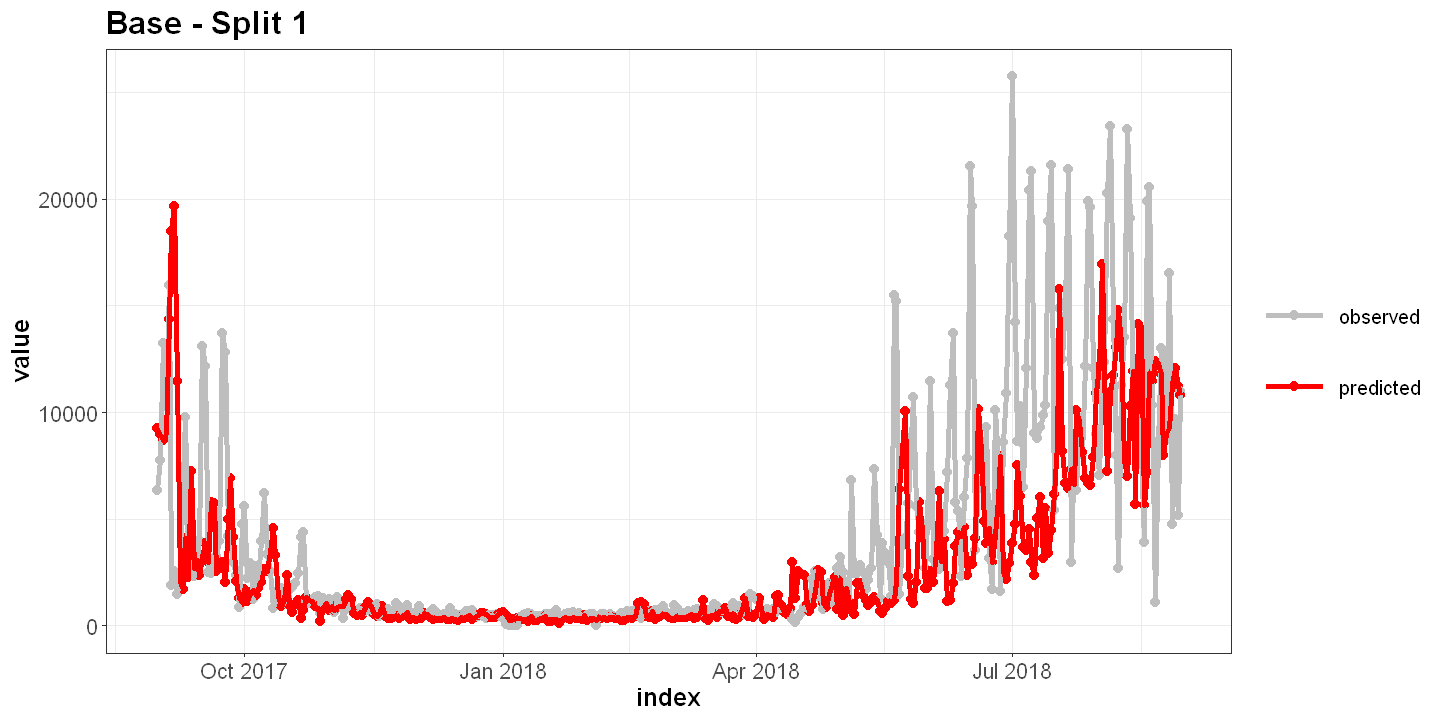

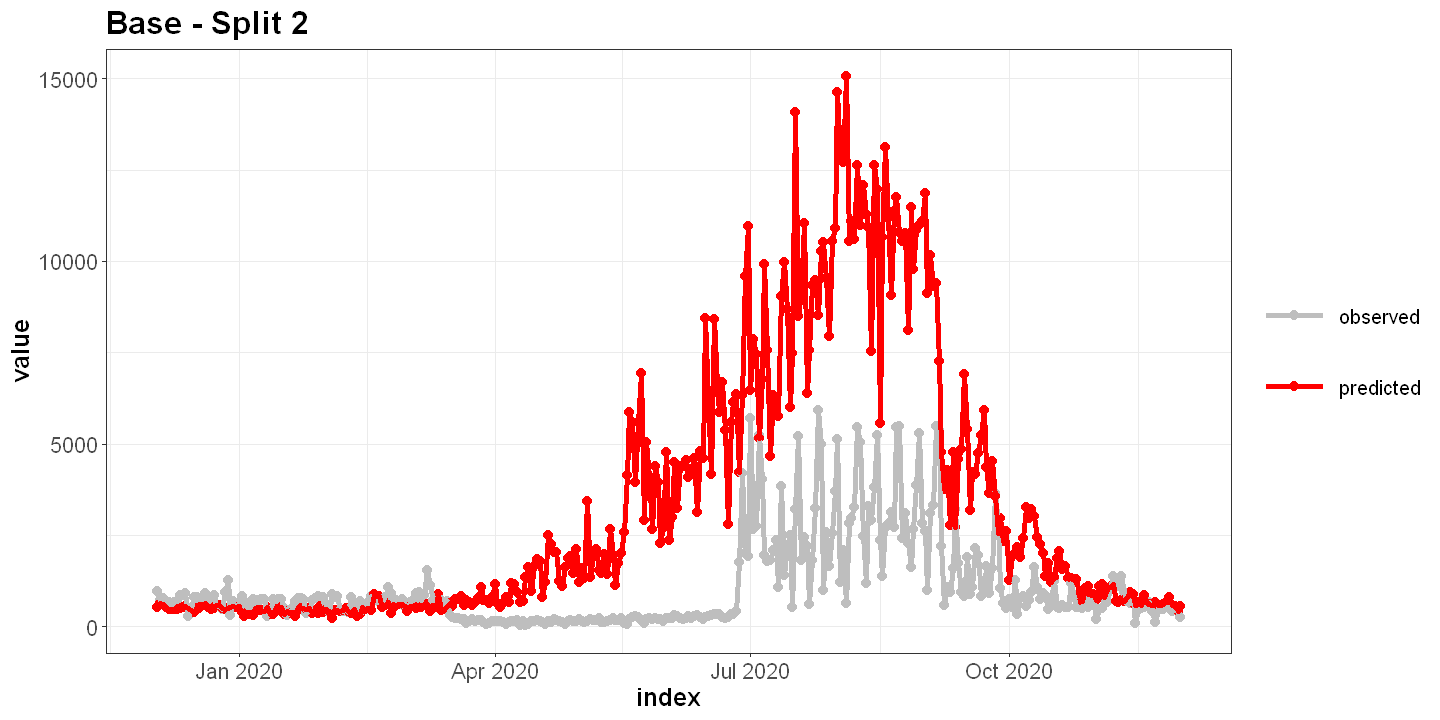

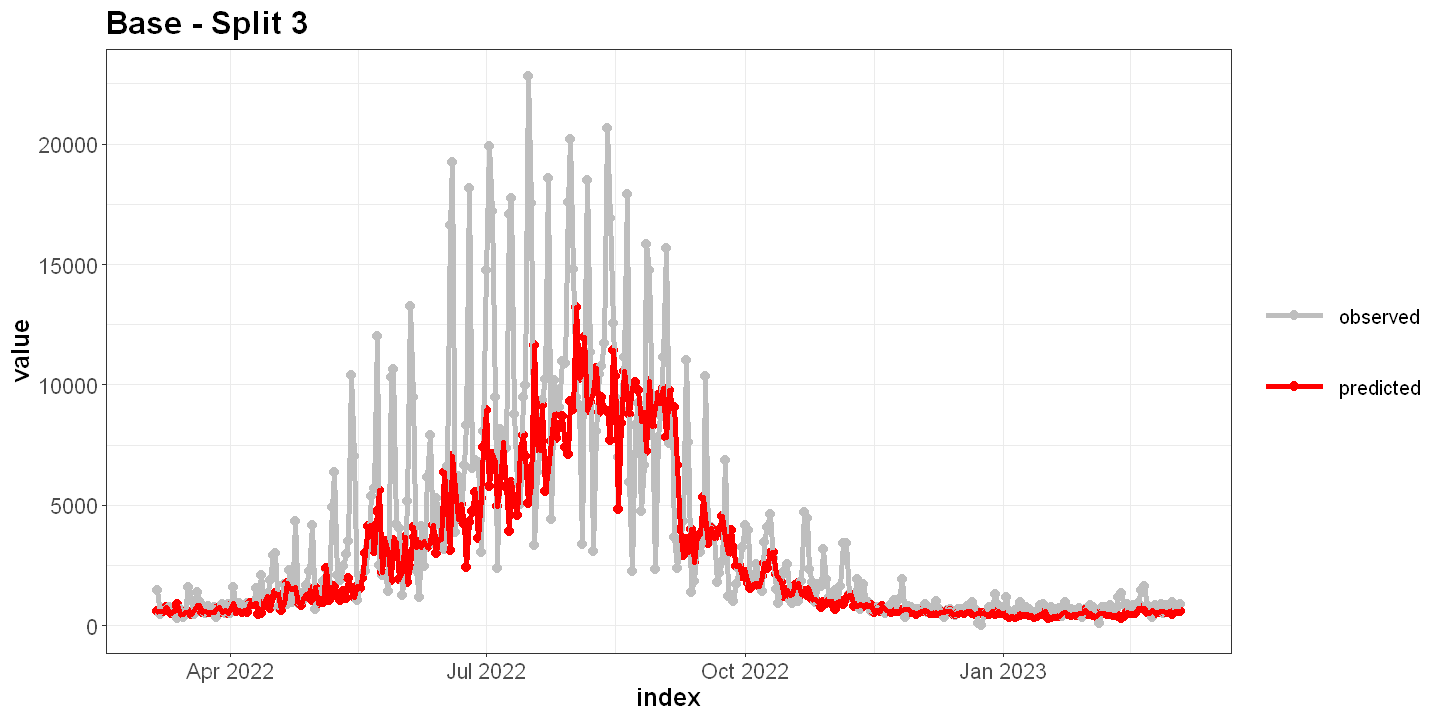

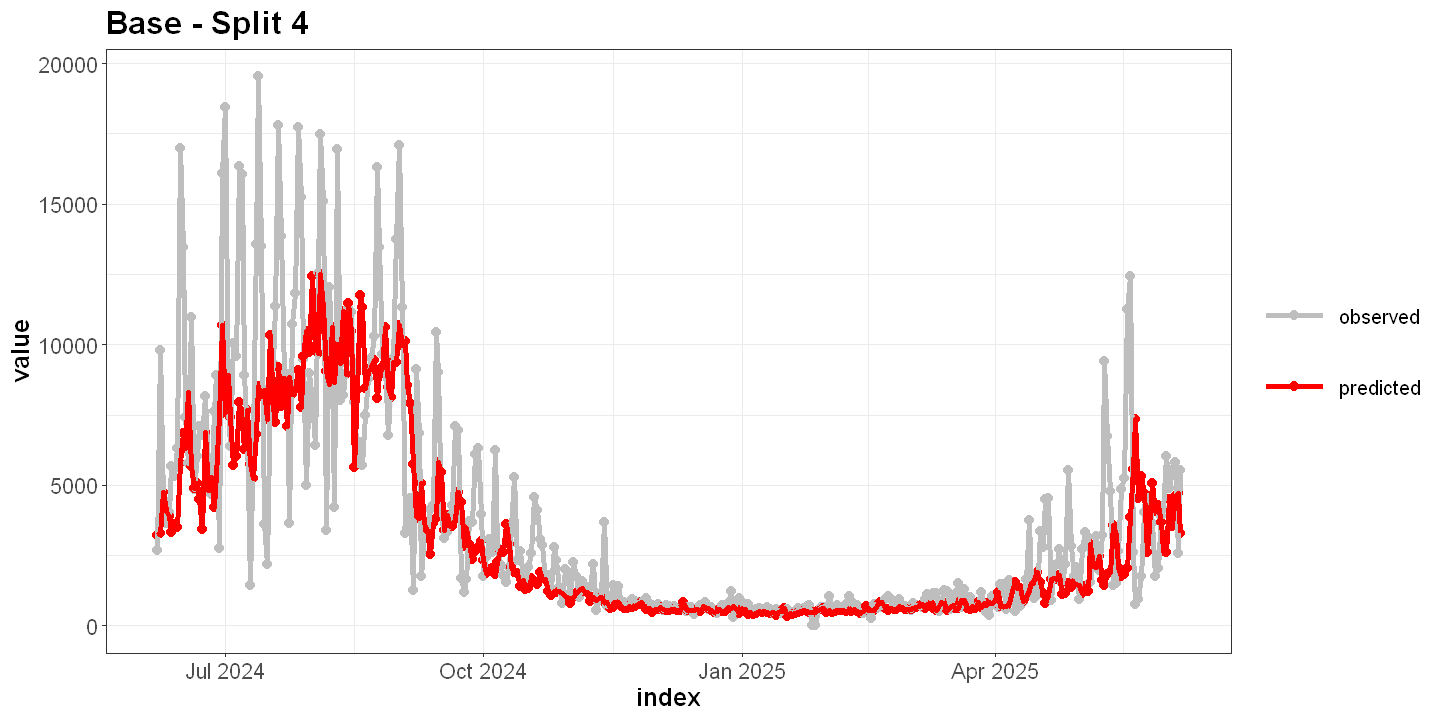

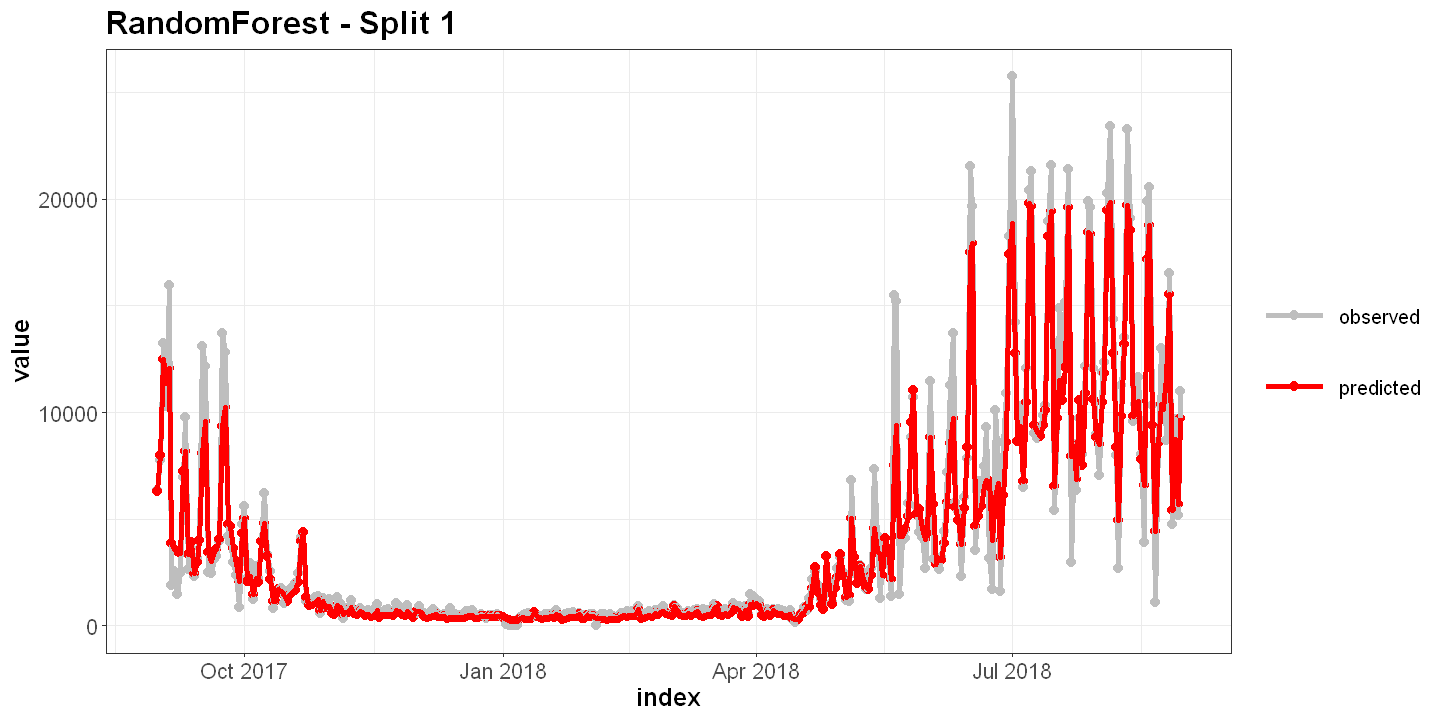

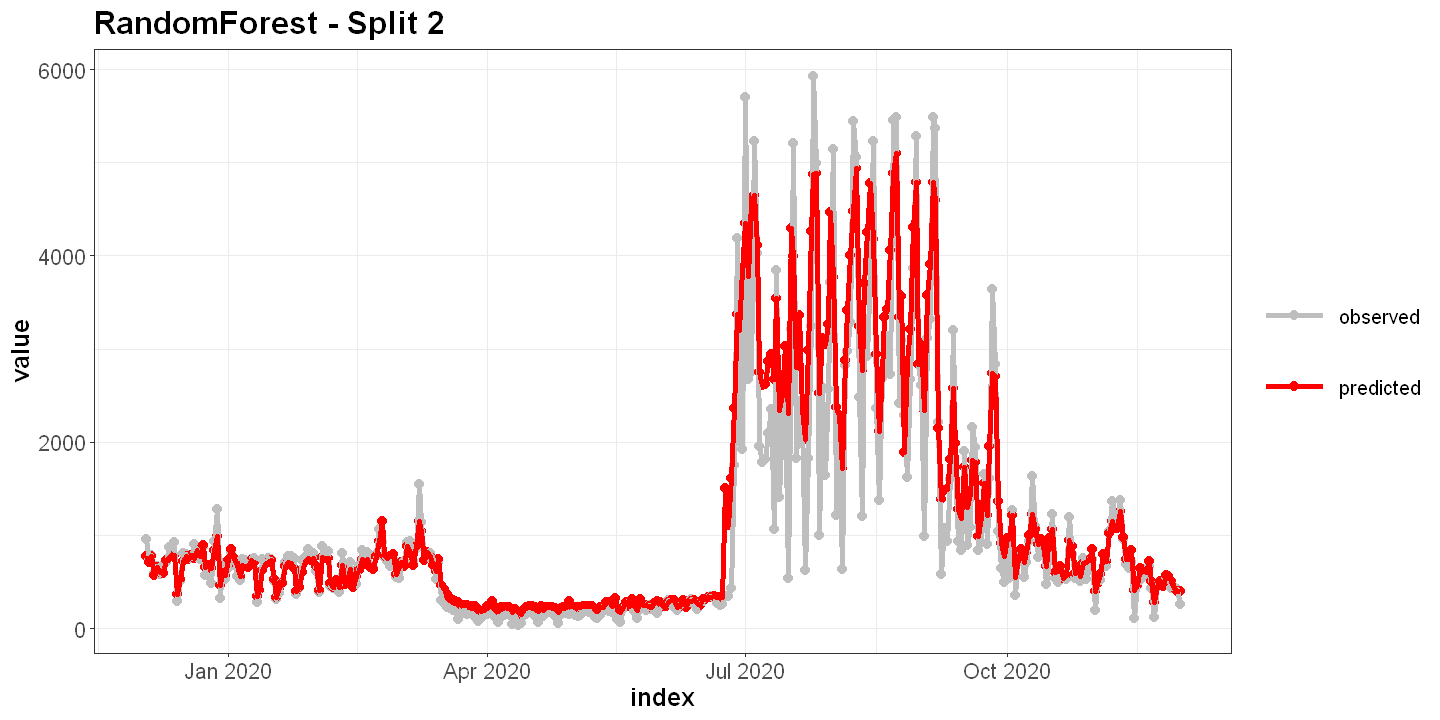

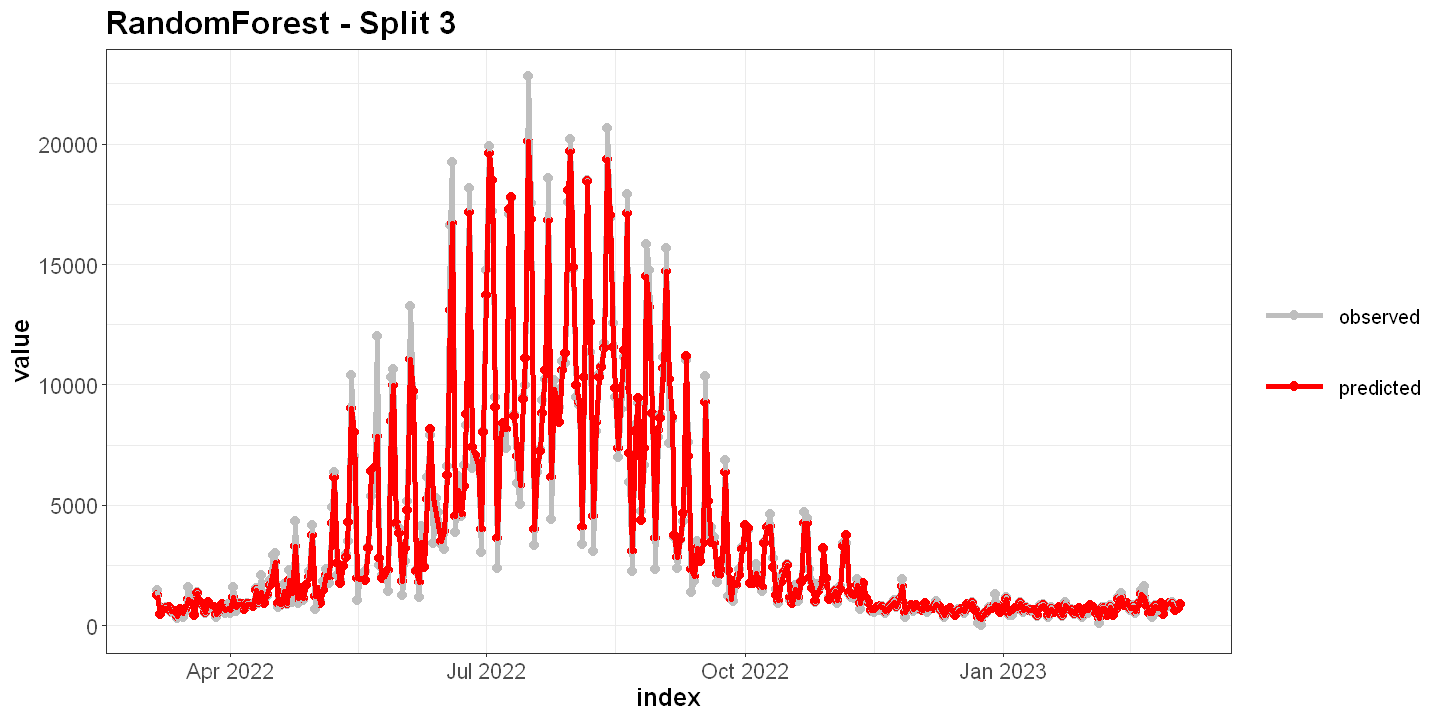

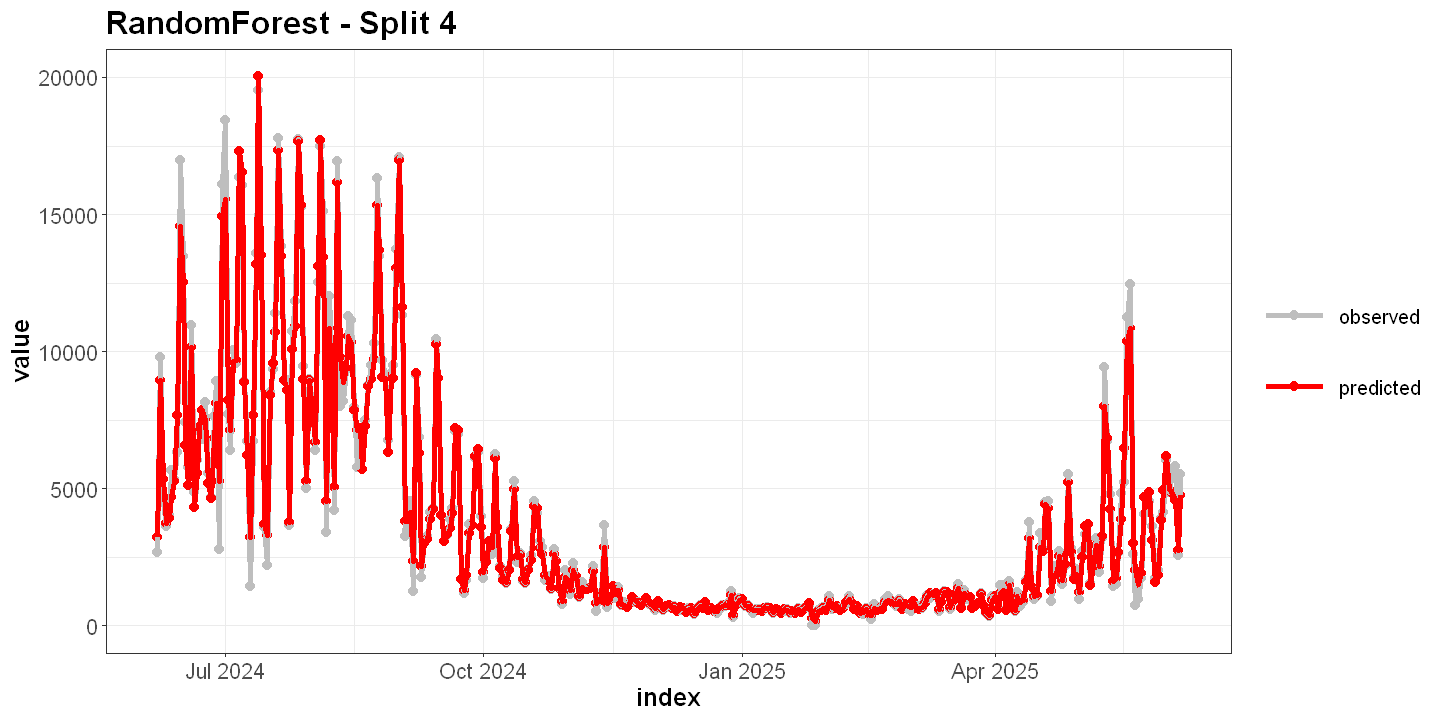

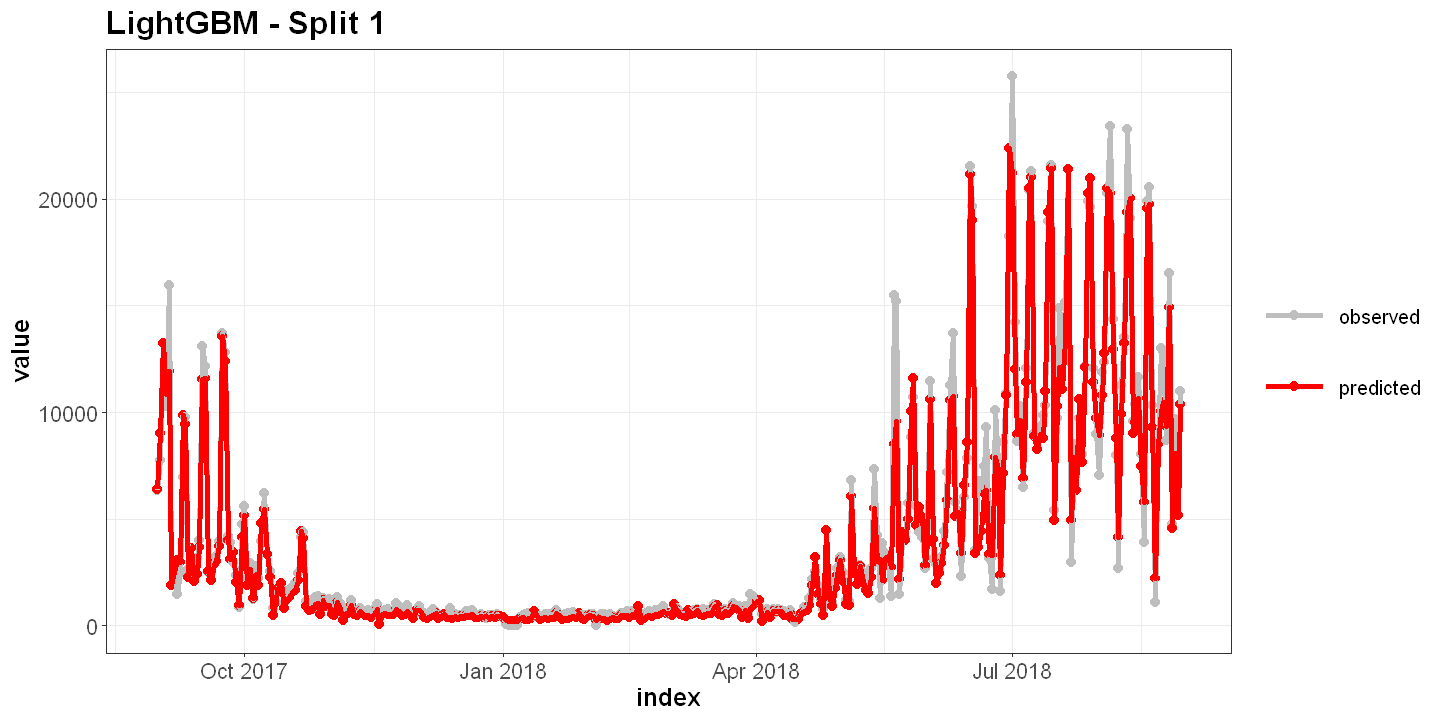

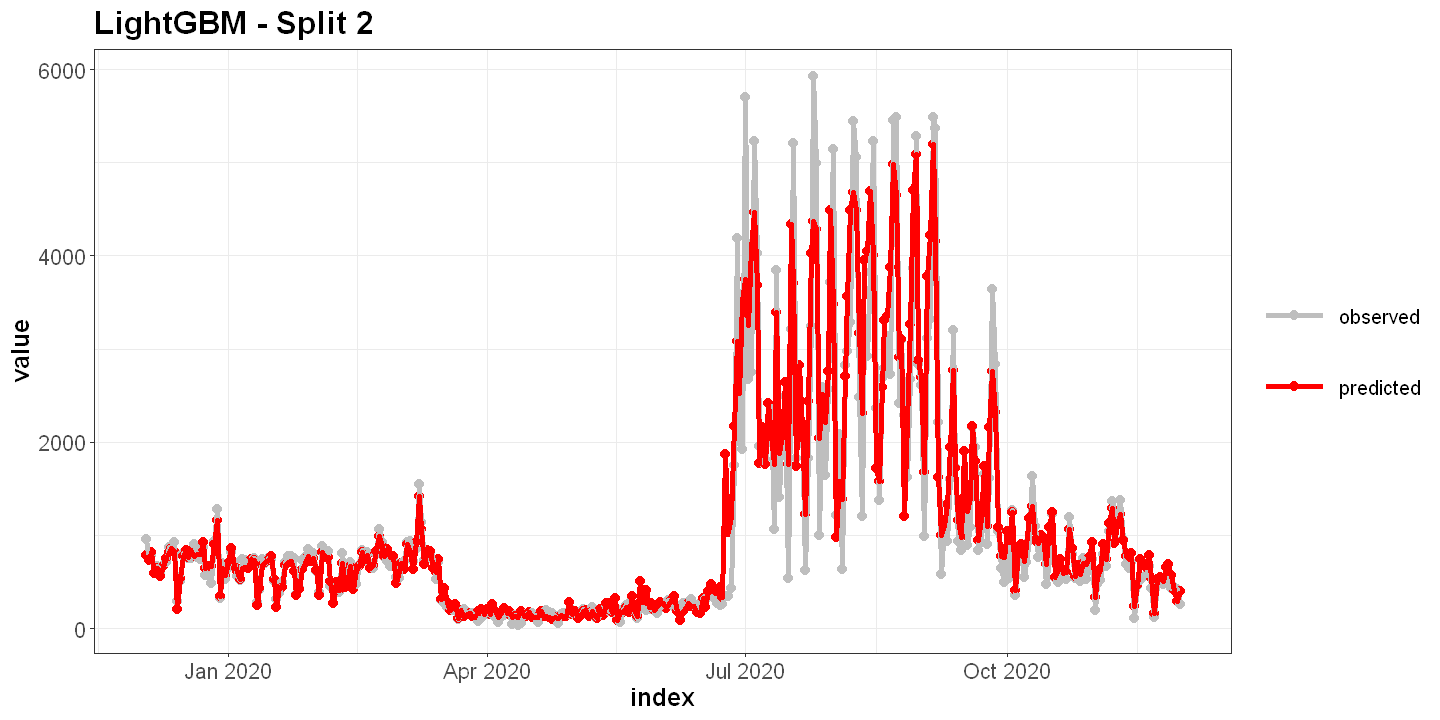

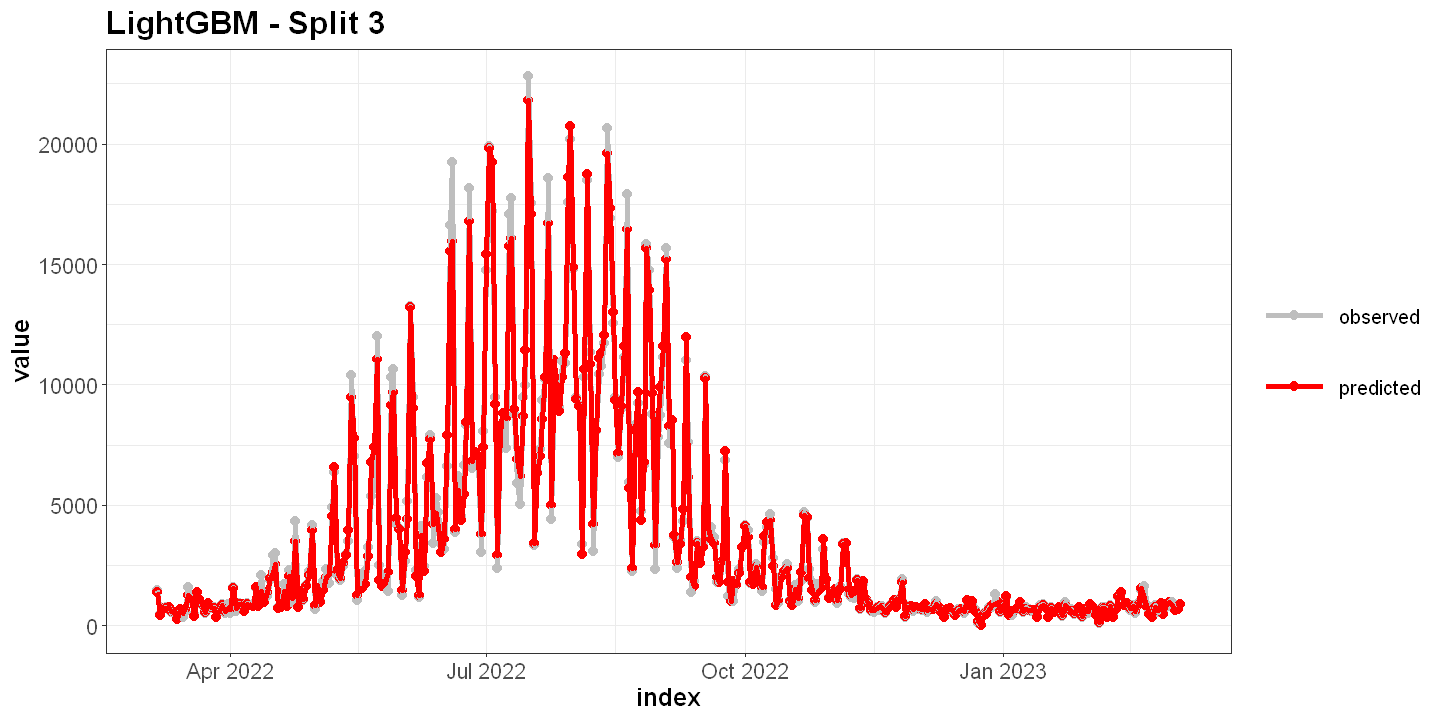

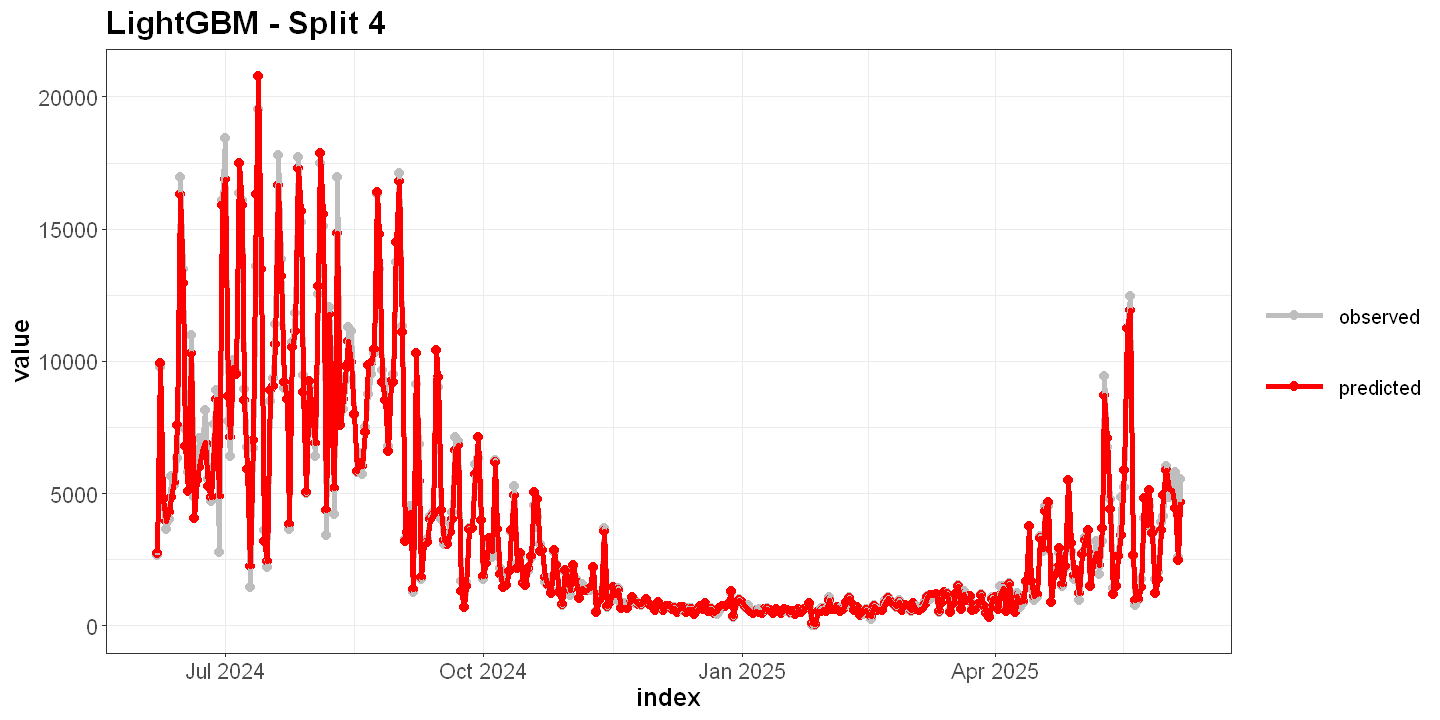

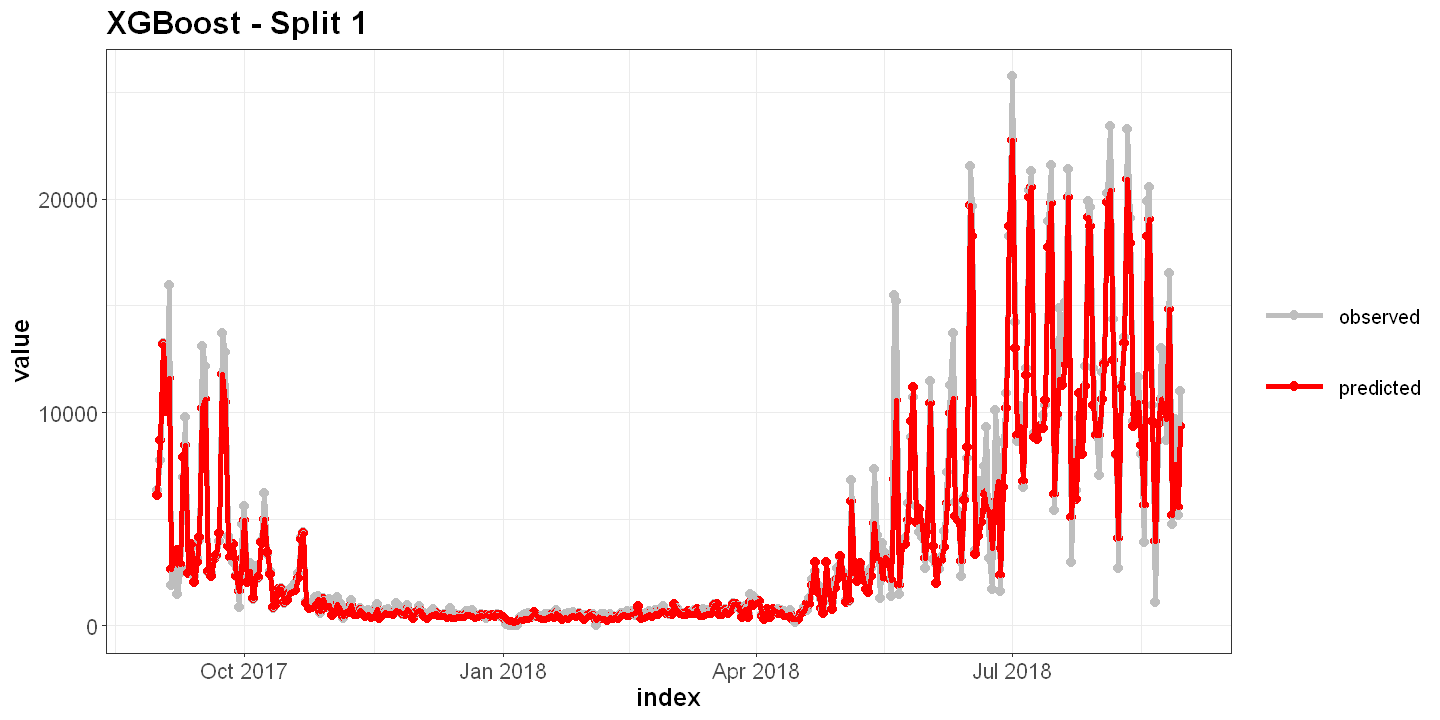

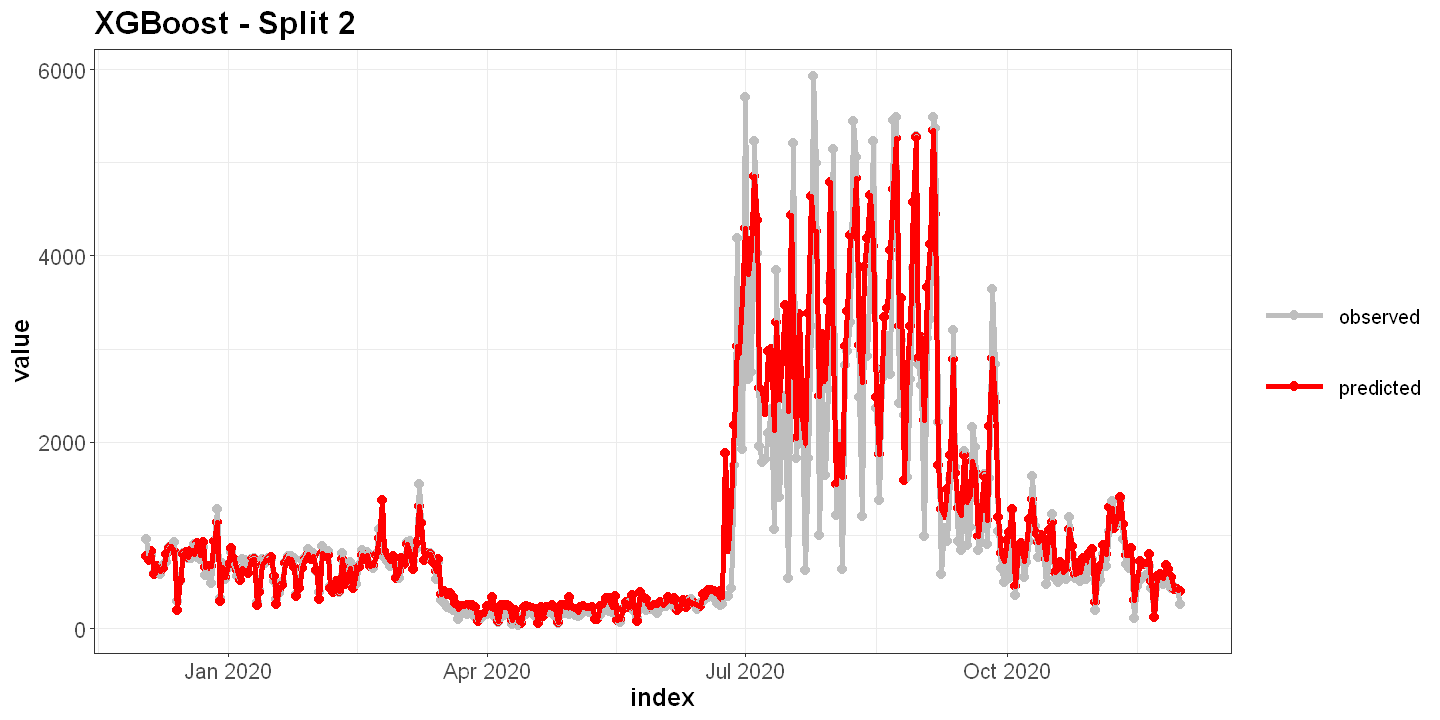

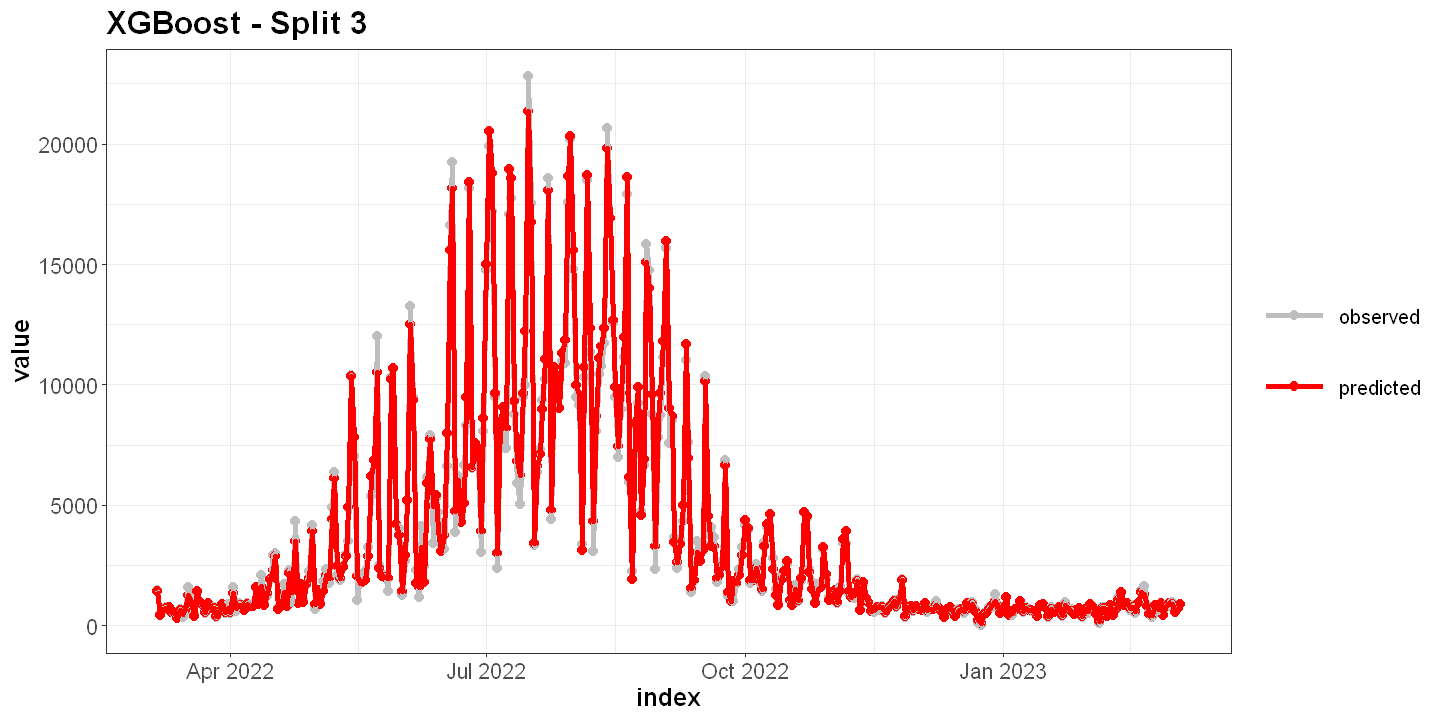

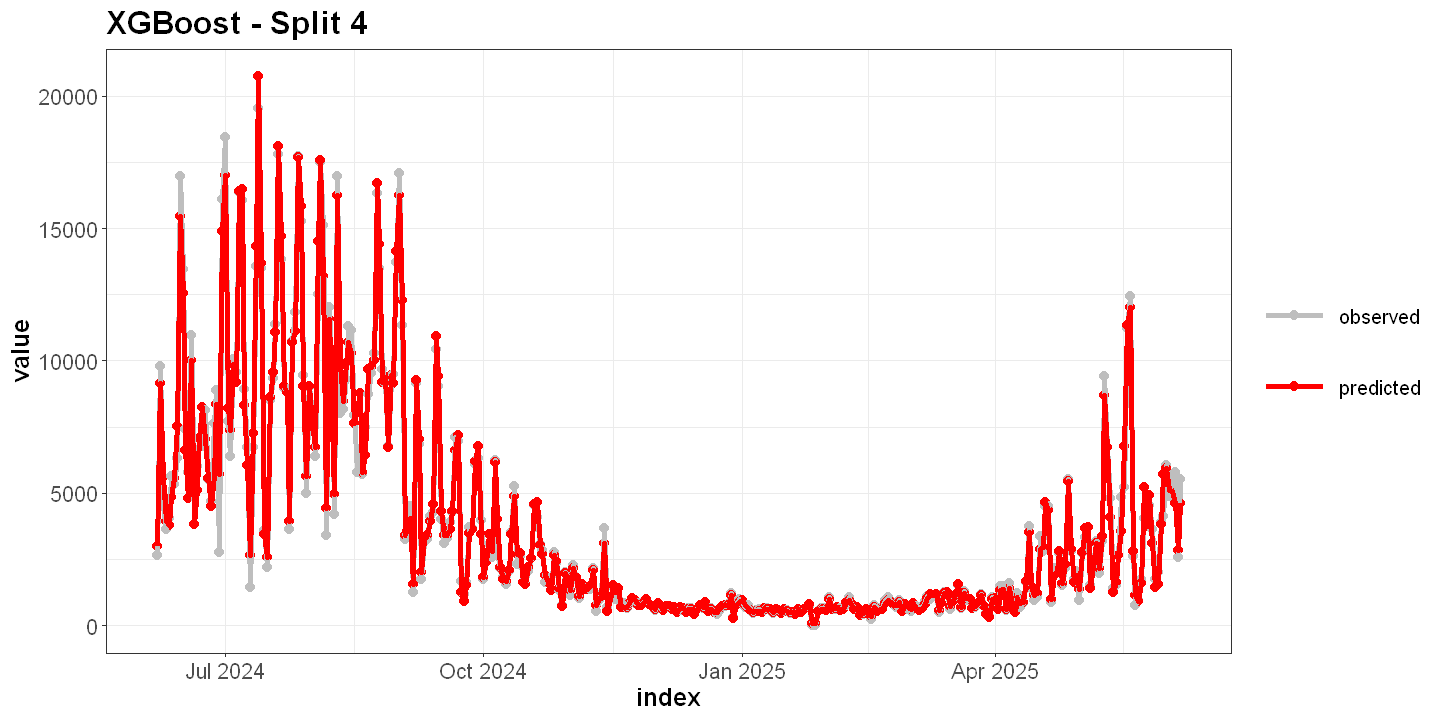

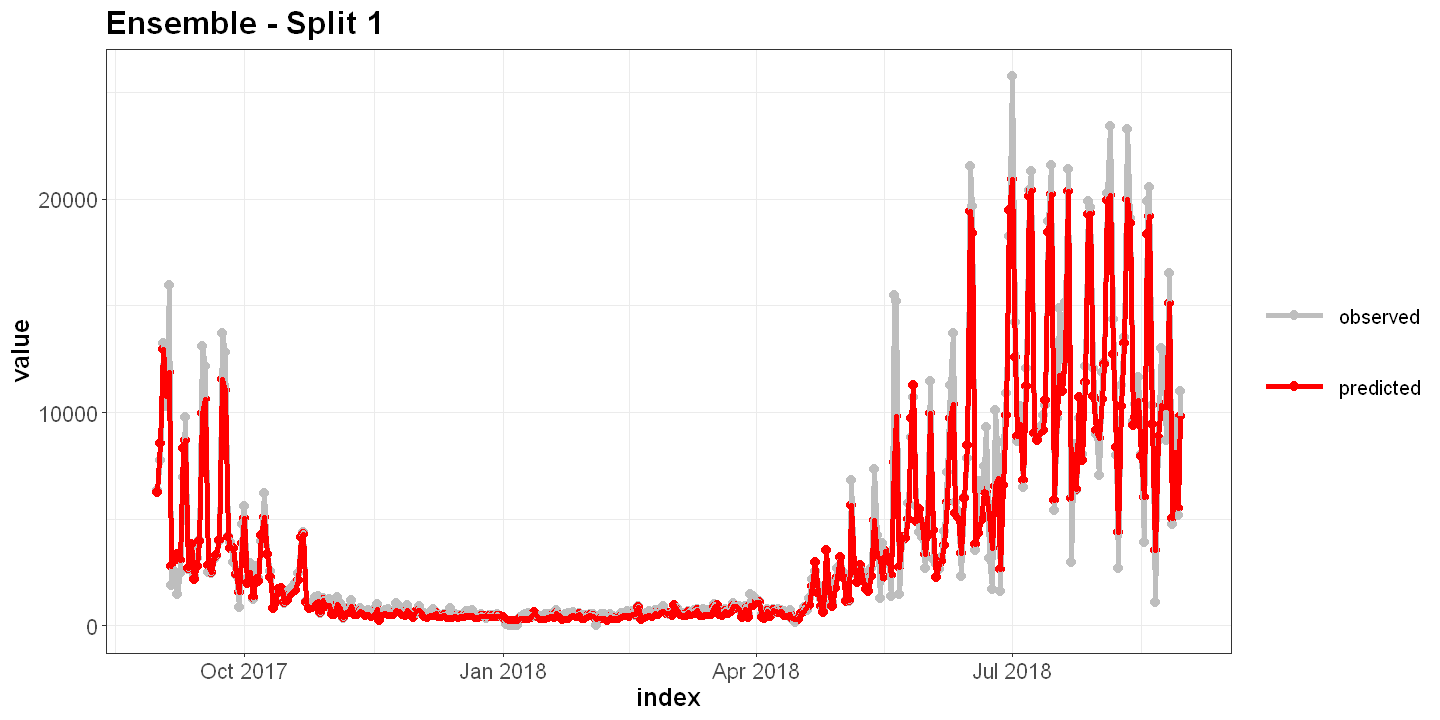

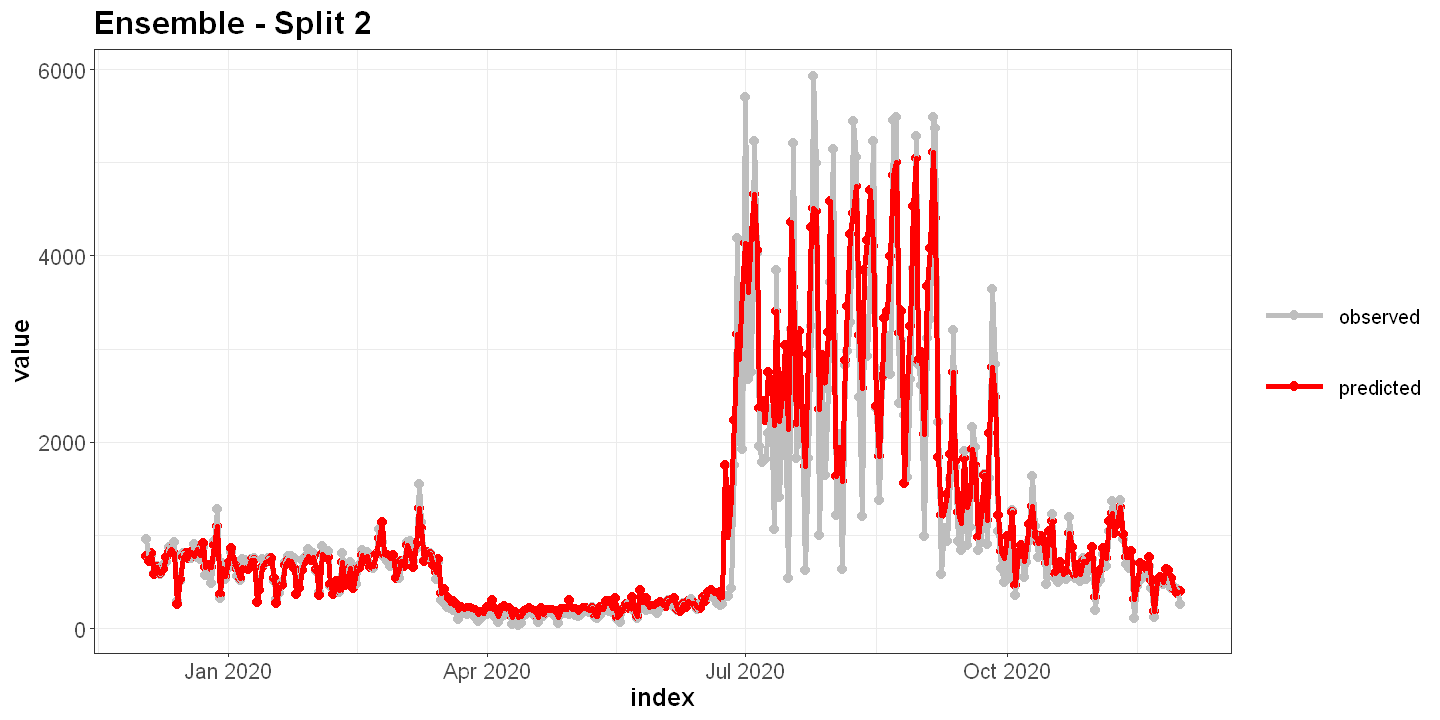

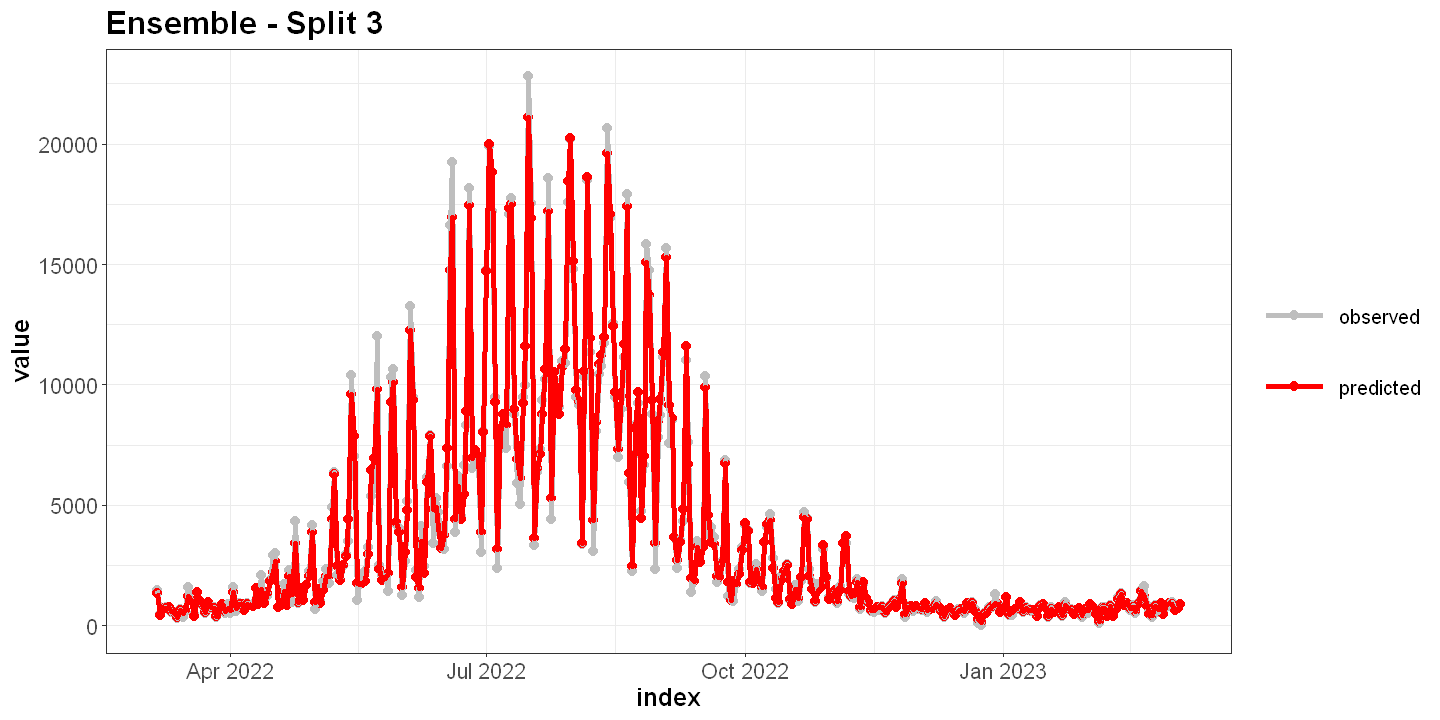

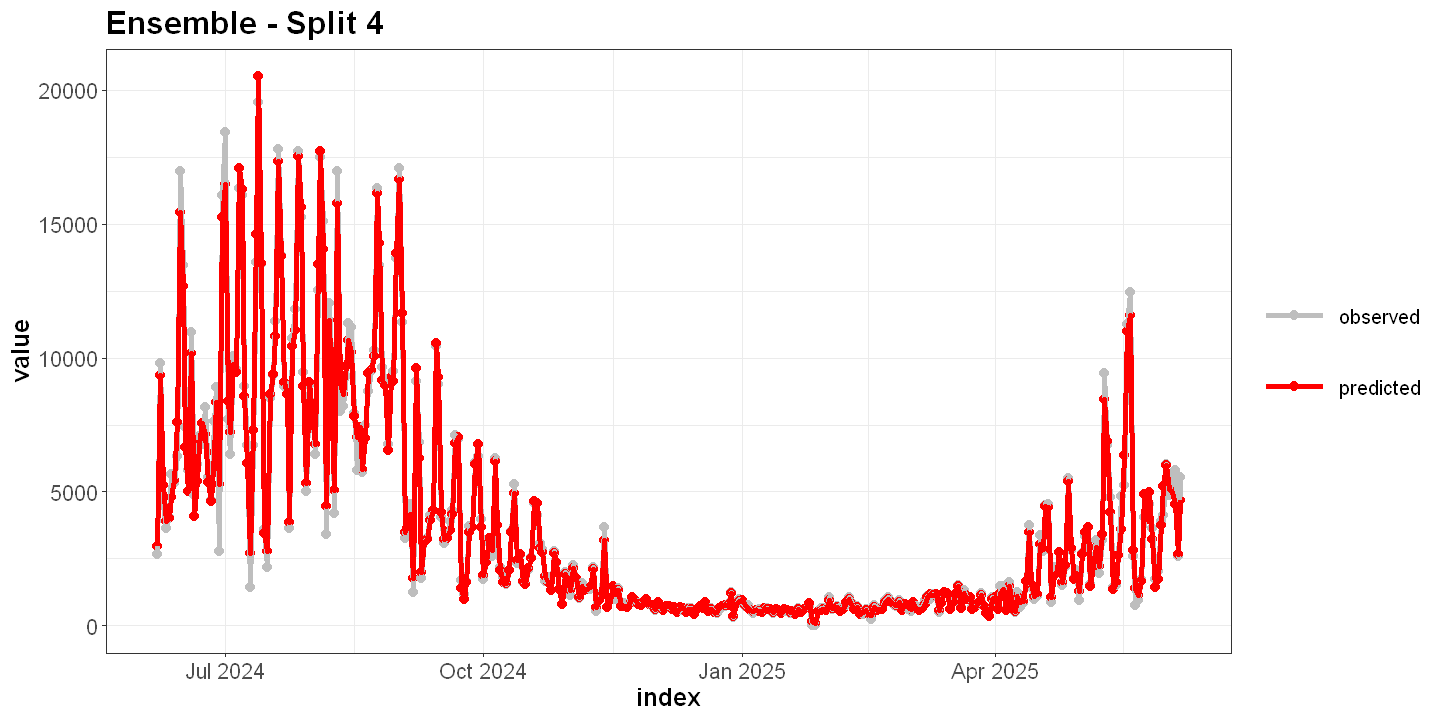

In [97]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot_predictions(data = df, preds = result$preds, target_col = "Redemption_Count")


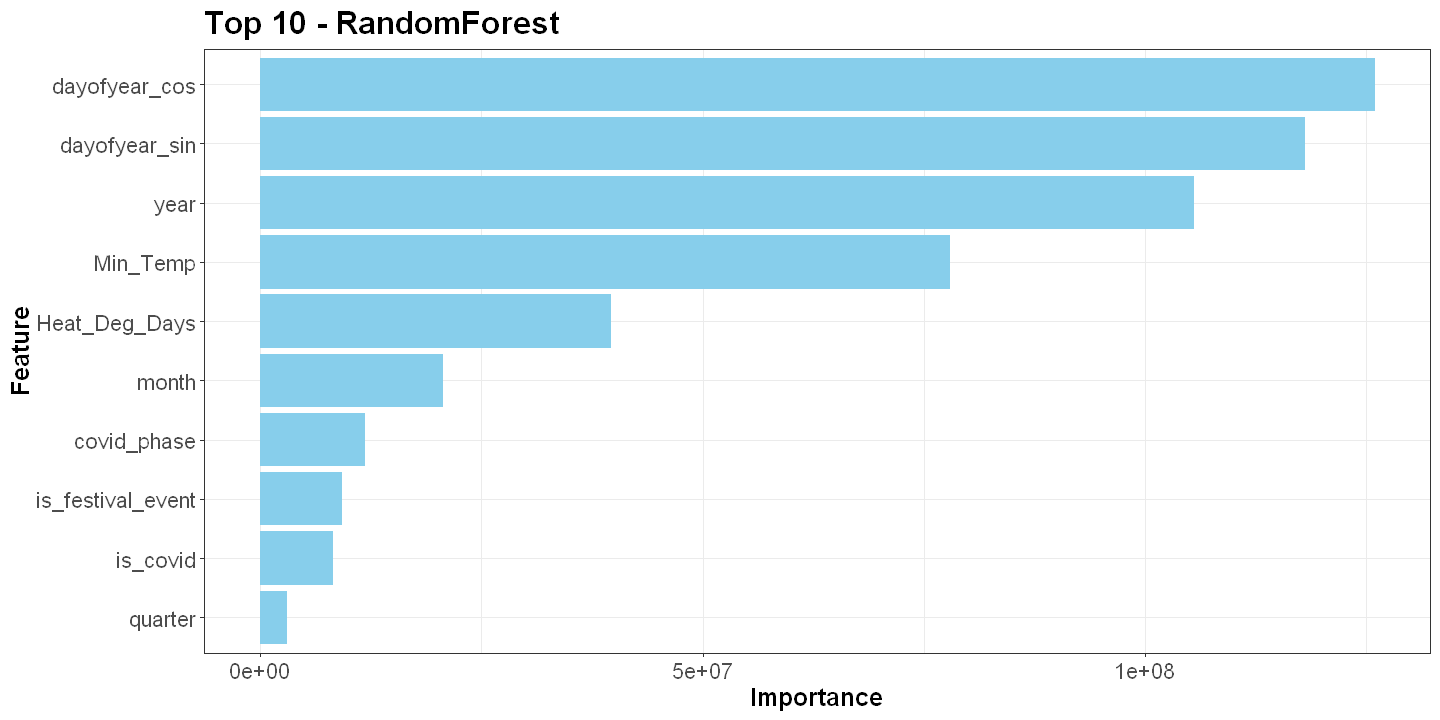

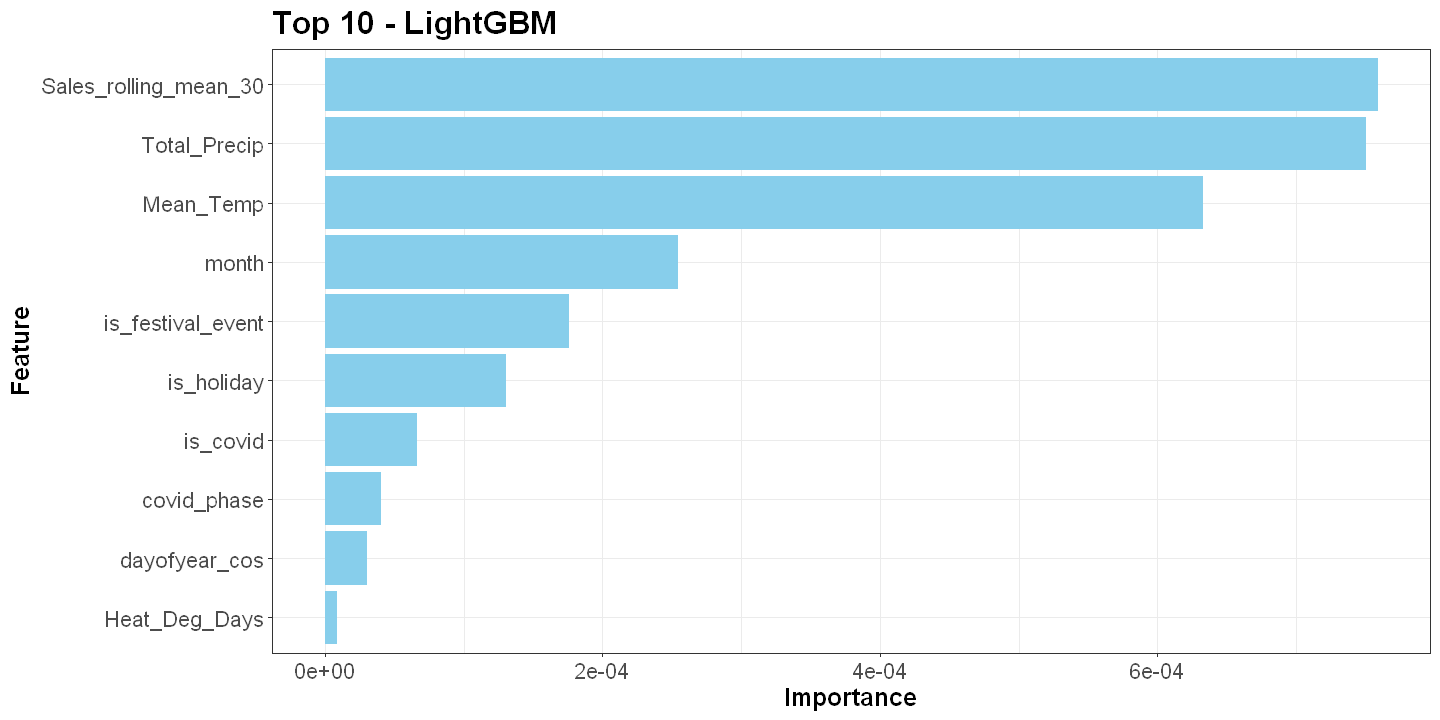

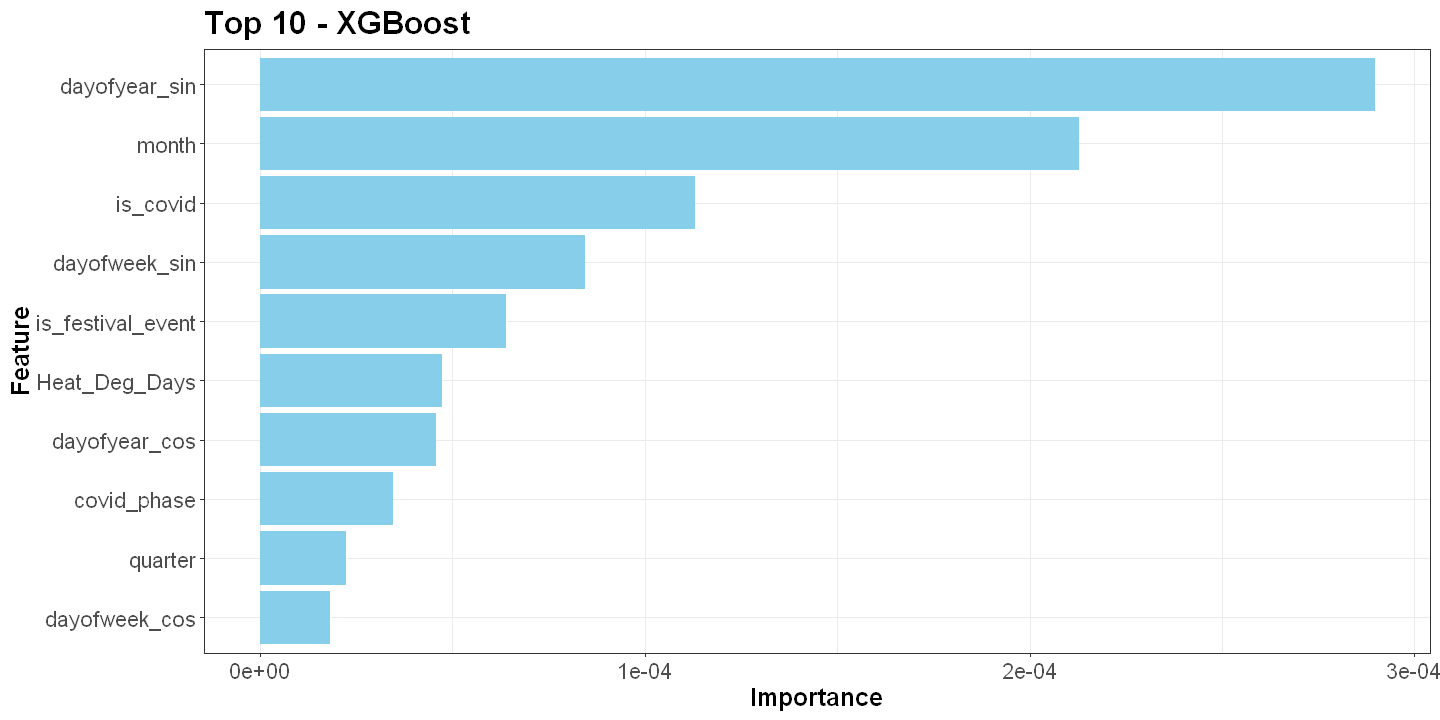

In [93]:
#options(repr.plot.width = 10, repr.plot.height = 4)
plot_feature_importance(result$importances)